In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
from pandas import Series, DataFrame
from pandas.core.groupby import GroupBy
from scipy.stats import ttest_ind
from scipy.stats import norm
import os.path

In [2]:
from _init import *
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual


In [3]:
data_set = Dataset()
cleaning= Data_cleaning()
rambling = Data_rambling()
general_info= General_data()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423799 entries, 0 to 423798
Data columns (total 29 columns):
id                        423799 non-null int64
portal_id                 423799 non-null int64
portal_name               423799 non-null object
main_type_id              329103 non-null float64
main_type_name            329103 non-null object
transaction               365998 non-null float64
transaction_name          349237 non-null object
price                     405987 non-null object
area_total                158864 non-null object
price_permeter            251170 non-null object
apartment_room_number     207571 non-null object
apartment_floor           45774 non-null object
building_floornumber      0 non-null float64
building_year             116172 non-null float64
description               418827 non-null object
location_latitude         194977 non-null object
location_longitude        194995 non-null object
location_province_name    349641 non-null object
location_di

In [4]:
df=data_set.df_set()

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: Could not interpret input 'wojewodztwo'

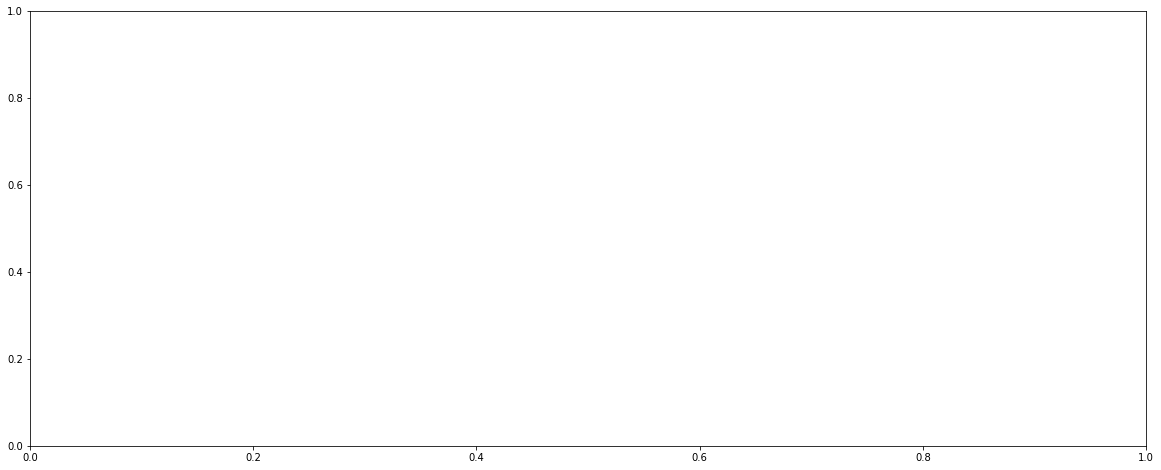

In [11]:
#@widgets.interact_manual(taget=[], feature=[])
general_info.box_plot(df)